
=== ANGGOTA KELOMPOK ===

1. Bayu Setiawan
   NIM   : 1223150015
   Prodi : Sistem Informasi Manajemen (SIM) 23 SH

2. Destiana Sapitri
   NIM   : 1223150018
   Prodi : Sistem Informasi Manajemen (SIM) SH 23

3. Albert Octavianus
   NIM   : 1223150101
   Prodi : Sistem Informasi Manajemen (SIM) M 23

=== (1) TENTUKAN MODEL TERBAIK: NAIVE BAYES ATAU DECISION TREE ===

=== Naive Bayes ===
              precision    recall  f1-score   support

    Negative       0.41      0.97      0.57      4656
     Neutral       0.00      0.00      0.00      1455
    Positive       0.93      0.40      0.56      8699

    accuracy                           0.54     14810
   macro avg       0.45      0.45      0.38     14810
weighted avg       0.68      0.54      0.51     14810

Akurasi   : 0.54
Precision : 0.45
Recall    : 0.45
F1-Score  : 0.38

=== Decision Tree ===
              precision    recall  f1-score   support

    Negative       0.79      0.76      0.78      4656
     Neutral       0.74     

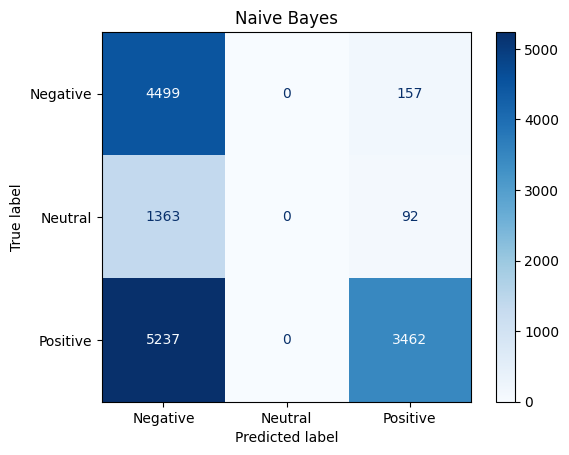

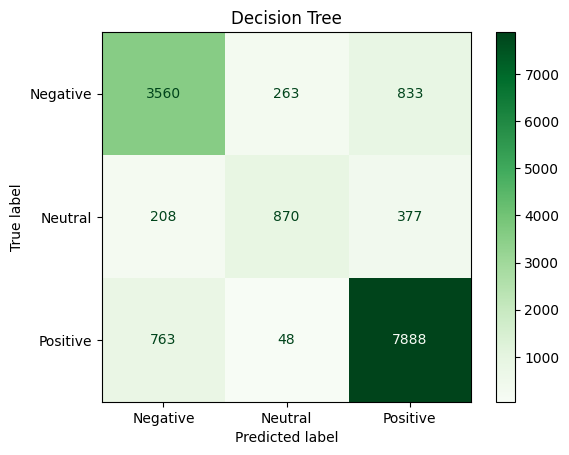


>>> Model terbaik berdasarkan F1-score adalah: Decision Tree
 
 === (2) GUNAKAN MODEL TERBAIK UNTUK MENGHITUNG POLARITY DAN SUS TABLE === 

=== STRUKTUR DECISION TREE ===
- Jika SUS > 70 dan CR > 0.6 → Polarity = Positive
- Jika SUS < 70 dan Lostness tinggi → Polarity = Negative
Artinya, semakin tinggi SUS (kepuasan pengguna), model lebih yakin bahwa opini bersifat positif.
Sebaliknya, SUS rendah sering muncul pada data yang berlabel negatif.
|--- SUS <= 71.03
|   |--- TD <= 1.50
|   |   |--- Fields <= 0.50
|   |   |   |--- SUS <= 68.18
|   |   |   |   |--- SUS <= 65.37
|   |   |   |   |   |--- SUS <= 64.48
[Lihat selengkapnya...]


Button(button_style='info', description='Lihat Selengkapnya', style=ButtonStyle())

Output()


=== TABEL OPINI  ===
V1     Lecturer                      Student                     
       SUS >70        SUS <70        SUS >70        SUS <70       
       pos(+) neg(-) pos(+) neg(-) pos(+) neg(-) pos(+) neg(-)

Ac      222    128    116    105    9437    3     3775   1656 

CS       61     81    143     65    7273   1570   781    3229 

Mn      455     79    139    296   15890   6827   1004   6444 

En      1211    52    340    186    3462    22    993    2031 


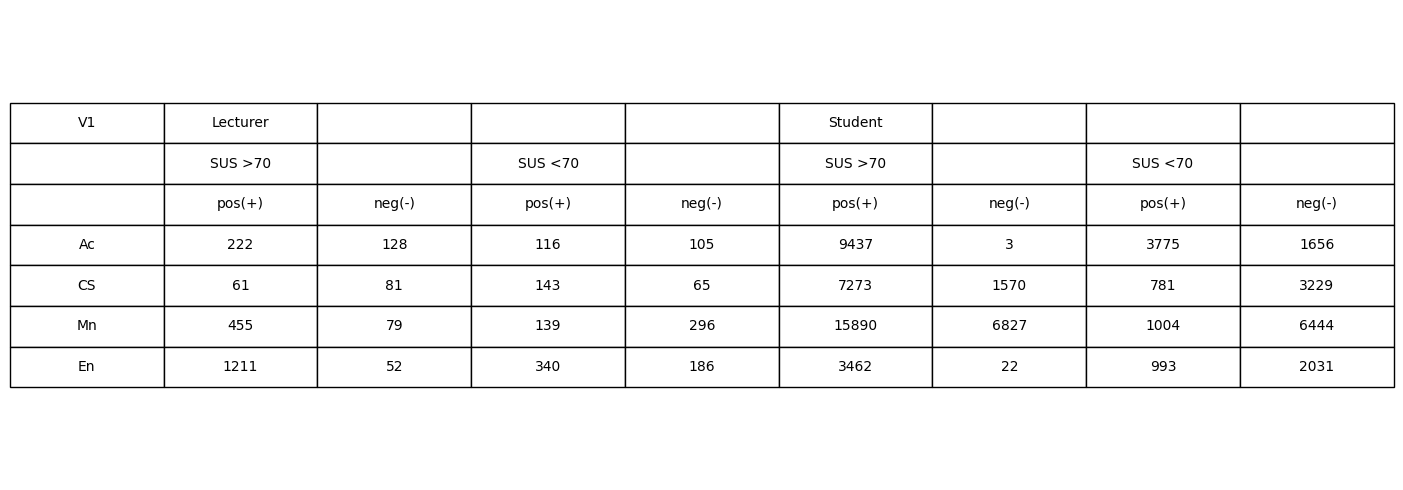

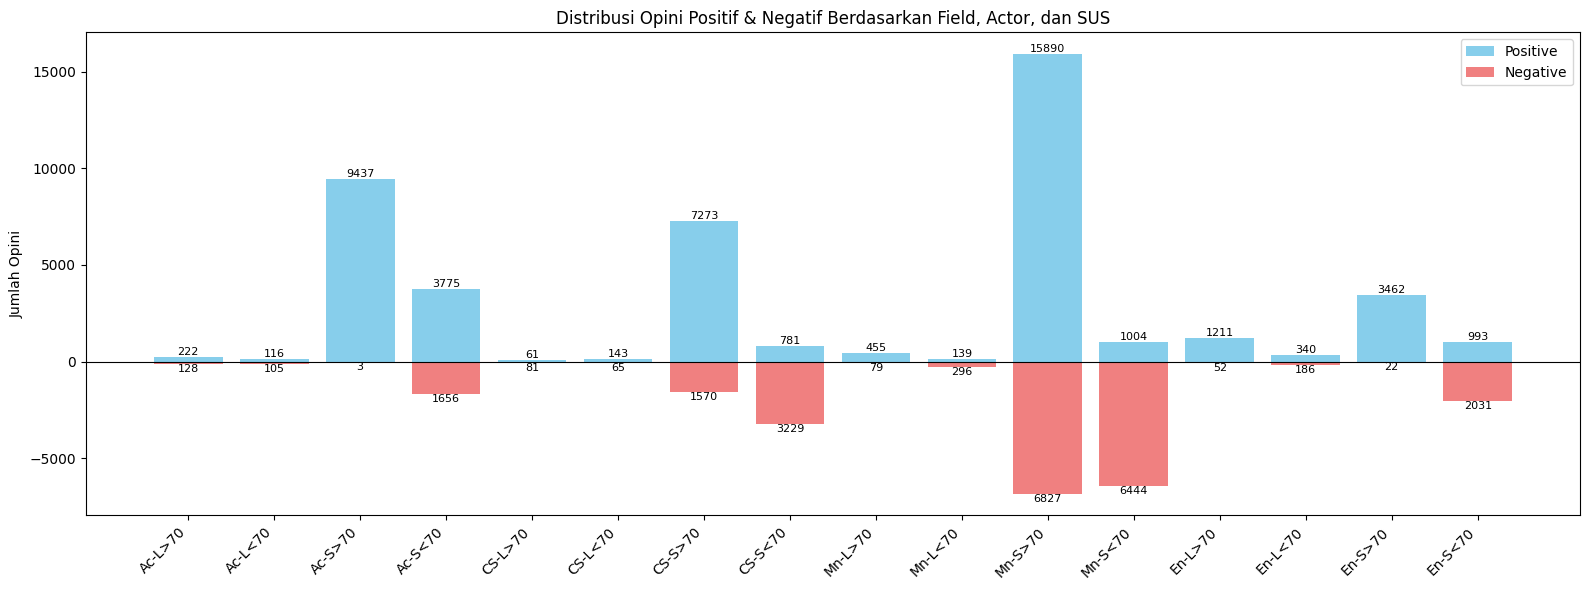

In [14]:
# === IMPORT LIBRARY ===
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import (
    classification_report, accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)
from IPython.display import display
import ipywidgets as widgets

# === LOAD DATASET ===
df = pd.read_excel("Dataset_Quiz.xlsx")

# === ANGGOTA KELOMPOK ===
def tampilkan_nama():
    print("\n=== ANGGOTA KELOMPOK ===")
    print("\n1. Bayu Setiawan\n   NIM   : 1223150015\n   Prodi : Sistem Informasi Manajemen (SIM) 23 SH")
    print("\n2. Destiana Sapitri\n   NIM   : 1223150018\n   Prodi : Sistem Informasi Manajemen (SIM) SH 23")
    print("\n3. Albert Octavianus\n   NIM   : 1223150101\n   Prodi : Sistem Informasi Manajemen (SIM) M 23")
tampilkan_nama()

# === ENCODING KATEGORI ===
le_actors = LabelEncoder()
le_fields = LabelEncoder()
le_polarity = LabelEncoder()
df['Actors'] = le_actors.fit_transform(df['Actors'])
df['Fields'] = le_fields.fit_transform(df['Fields'])
df['Polarity'] = le_polarity.fit_transform(df['Polarity'])

# === FITUR & TARGET ===
X = df[['Actors', 'Fields', 'CR', 'TD', 'Lostness', 'SUS']]
y = df['Polarity']

# === SPLIT DATA ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n=== (1) TENTUKAN MODEL TERBAIK: NAIVE BAYES ATAU DECISION TREE ===")

# === NAIVE BAYES ===
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)

# === DECISION TREE ===
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

# === METRIK DAN CONFUSION MATRIX ===
def evaluasi_model(nama, y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    print(f"\n=== {nama} ===")
    print(classification_report(y_test, y_pred, target_names=le_polarity.classes_, zero_division=0))
    print(f"Akurasi   : {acc:.2f}")
    print(f"Precision : {prec:.2f}")
    print(f"Recall    : {rec:.2f}")
    print(f"F1-Score  : {f1:.2f}")
    return acc, prec, rec, f1

# === EVALUASI KEDUA MODEL
nb_acc, nb_prec, nb_rec, nb_f1 = evaluasi_model("Naive Bayes", y_test, nb_preds)
dt_acc, dt_prec, dt_rec, dt_f1 = evaluasi_model("Decision Tree", y_test, dt_preds)

# === CONFUSION MATRIX VISUAL
print("\n=== CONFUSION MATRIX ===")
ConfusionMatrixDisplay.from_predictions(y_test, nb_preds, display_labels=le_polarity.classes_, cmap='Blues')
plt.title("Naive Bayes")
plt.show()

ConfusionMatrixDisplay.from_predictions(y_test, dt_preds, display_labels=le_polarity.classes_, cmap='Greens')
plt.title("Decision Tree")
plt.show()

# === TENTUKAN MODEL TERBAIK BERDASARKAN F1-SCORE
if dt_f1 >= nb_f1:
    best_model = dt_model
    model_name = "Decision Tree"
else:
    best_model = nb_model
    model_name = "Naive Bayes"

print(f"\n>>> Model terbaik berdasarkan F1-score adalah: {model_name}")

print(" \n === (2) GUNAKAN MODEL TERBAIK UNTUK MENGHITUNG POLARITY DAN SUS TABLE === ")

# === TAMPILKAN STRUKTUR DECISION TREE JIKA TERPILIH ===
if model_name == "Decision Tree":
    tree_text = export_text(best_model, feature_names=X.columns.tolist())
    preview = "\n".join(tree_text.split("\n")[:6]) + "\n[Lihat selengkapnya...]"

    full_output = widgets.Output()
    def on_button_click(b):
        with full_output:
            full_output.clear_output()
            print(tree_text)

    button = widgets.Button(description="Lihat Selengkapnya", button_style="info")
    button.on_click(on_button_click)

    print("\n=== STRUKTUR DECISION TREE ===")
    print("- Jika SUS > 70 dan CR > 0.6 → Polarity = Positive")
    print("- Jika SUS < 70 dan Lostness tinggi → Polarity = Negative")
    print("Artinya, semakin tinggi SUS (kepuasan pengguna), model lebih yakin bahwa opini bersifat positif.")
    print("Sebaliknya, SUS rendah sering muncul pada data yang berlabel negatif.")
    print(preview)
    display(button, full_output)

df['Predicted_Polarity'] = best_model.predict(X)
df['SUS_Category'] = df['SUS'].apply(lambda x: '>70' if x > 70 else '<70')
df['Actors_Label'] = le_actors.inverse_transform(df['Actors'])
df['Fields_Label'] = le_fields.inverse_transform(df['Fields'])
df['Polarity_Label'] = le_polarity.inverse_transform(df['Predicted_Polarity'])

# === AGREGASI TABEL ===
pivot_table = (
    df.groupby(['Fields_Label', 'Actors_Label', 'SUS_Category', 'Polarity_Label'])
    .size().unstack(fill_value=0).reset_index()
)

fields = df['Fields_Label'].unique()
final_table = []
for field in fields:
    row = [field]
    for actor in ['Lecturer', 'Student']:
        for sus_cat in ['>70', '<70']:
            subset = pivot_table[
                (pivot_table['Fields_Label'] == field) &
                (pivot_table['Actors_Label'] == actor) &
                (pivot_table['SUS_Category'] == sus_cat)
            ]
            pos = int(subset.get('Positive', 0).values[0]) if 'Positive' in subset.columns and not subset.empty else 0
            neg = int(subset.get('Negative', 0).values[0]) if 'Negative' in subset.columns and not subset.empty else 0
            row.extend([pos, neg])
    final_table.append(row)

# === HEADER TABEL ===
header1 = ["V1", "Lecturer", "", "", "", "Student", "", "", ""]
header2 = ["", "SUS >70", "", "SUS <70", "", "SUS >70", "", "SUS <70", ""]
header3 = ["", "pos(+)", "neg(-)", "pos(+)", "neg(-)", "pos(+)", "neg(-)", "pos(+)", "neg(-)"]

# === TAMPILKAN TABEL DI TERMINAL ===
print("\n=== TABEL OPINI  ===")
print("{:<6} {:^6} {:^6} {:^6} {:^6} {:^6} {:^6} {:^6} {:^6}".format(*header1))
print("{:<6} {:^6} {:^6} {:^6} {:^6} {:^6} {:^6} {:^6} {:^6}".format(*header2))
print("{:<6} {:^6} {:^6} {:^6} {:^6} {:^6} {:^6} {:^6} {:^6}".format(*header3))
for row in final_table:
    print("\n{:<6} {:^6} {:^6} {:^6} {:^6} {:^6} {:^6} {:^6} {:^6}".format(*row))

# === VISUALISASI TABEL ===
fig, ax = plt.subplots(figsize=(14, 5))
ax.axis('off')
table = ax.table(
    cellText=[header1, header2, header3] + final_table,
    cellLoc='center',
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 2)
plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt
import numpy as np

# === SIAPKAN LABEL DAN NILAI ===
labels = []
positive = []
negative = []

# Ambil data dari final_table (yang sudah berisi data agregat)
for row in final_table:
    field = row[0]
    # Kombinasi: [Lecturer >70, <70, Student >70, <70]
    categories = ['L>70', 'L<70', 'S>70', 'S<70']
    for i in range(4):
        labels.append(f"{field}-{categories[i]}")
        positive.append(row[1 + i*2])
        negative.append(row[2 + i*2])

# Konversi ke numpy array untuk mudahnya
x = np.arange(len(labels))

# === PLOT GRAFIK ===
fig, ax = plt.subplots(figsize=(16, 6))
bar1 = ax.bar(x, positive, label='Positive', color='skyblue')
bar2 = ax.bar(x, [-n for n in negative], label='Negative', color='lightcoral')

# === DEKORASI GRAFIK ===
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_ylabel("Jumlah Opini")
ax.set_title("Distribusi Opini Positif & Negatif Berdasarkan Field, Actor, dan SUS")
ax.legend()
ax.axhline(0, color='black', linewidth=0.8)

# Tambahkan label nilai di atas batang
for i in range(len(x)):
    ax.text(x[i], positive[i]+0.2, str(positive[i]), ha='center', va='bottom', fontsize=8)
    ax.text(x[i], -negative[i]-0.2, str(negative[i]), ha='center', va='top', fontsize=8)

plt.tight_layout()
plt.show()





